In [125]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mt
import matplotlib.cm as cm

In [126]:
#Defining the coordinates of the spring mesh system
    #Ni = Number of nodes in x direction
    #Nj = Number of nodes in y direction

def node_coordinates(Ni, Nj):
  coo = []
  for i in range(0,Ni):
    for j in range(0,Nj):
      coo.append((j,i))

#Reshaping the array to simulate the spring mesh

  coo = np.array(coo).reshape((Nj,Ni,2))
  return coo

In [127]:
## Definations:
#The function is deployed to calaculate the force on each node due to non linear springs
    # K1, k2 = Spring Constants
    # c = array of all the coordinates of the nodes
    # dt = time step
    #For non-linearity, we are using the anhoarmonic interaction formula to model the atomic interaction in the network
    #Anharmonic Interaction:
      # f = -k1*(d1-d0) - k2*(d1-d0)**3
      # f = force due to spring
      # d1 = Stretched length of the spring
      # d0 = inital length of the spring
      #m = square of the diffrence of the x coordinates
      #n = square of the diffrence of the y coordinates

def force_due_to_nl_spring_in_2d(k1,k2,c,dt):
  force_nl_spring_in_2d = []
  q = c.shape[0]
  f=0
  for y in range(0, q):
    for x in range(0, q-1):
      m0 = (c[y][x+1][0]-c[y][x][0])**2
      n0 = (c[y][x][1] - c[y][x][1])**2

      # Appending the force on defect node as zero since it is missing

      if (c[y][x+1][0]==-1):
        force_nl_spring_in_2d.append((c[y][x+1][0],c[y][x+1][1],0))
        continue

      if (c[y][x][0]==0):

      #Adding 5% elongation to all the nodes in horizontal direction i.e; applying the normal force

        m1 = (c[y][x+1][0]-(((5/100)*(c[y][x+1][0]-c[y][x][0])) + c[y][x][0]))**2
        n1 = (c[y][x][1] - c[y][x][1])**2

      #flagging the defect with -1

      elif (c[y][x][0]==-1):
        m1 = (c[y][x+1][0]-(((((-1)*f*(dt**2)))/2) + c[y][x-1][0]))**2
        n1 = (c[y][x][1] - c[y][x][1])**2

      #runnning the loop and calculating the dislplacement based on newton's laws of motion, considiring the unit mass of nodes

      else:
        m1 = (c[y][x+1][0]-(((((-1)*f*(dt**2)))/2) + c[y][x][0]))**2
        n1 = (c[y][x][1] - c[y][x][1])**2

      d0 = np.sqrt(m0 + n0)
      d1 = np.sqrt(m1 + n1)
      f = -k1*(d1-d0) - k2*(d1-d0)**3
      force_nl_spring_in_2d.append((c[y][x+1][0],c[y][x+1][1],f))


  #Adding the action reaction force on 1st node of each row, i.e; the force applied to pull the first node of each row
  fx = np.array(force_nl_spring_in_2d)
  fx_x = fx[:,2]
  fx_d = fx_x.reshape(q,-1)
  fx_first = fx_d[:, 0]*(-1)
  fx_first = fx_first.reshape(q, 1)
  f_tot_in_2d = np.concatenate((fx_first, fx_d), axis=1)

  return f_tot_in_2d

##Example

2.5500003501093937

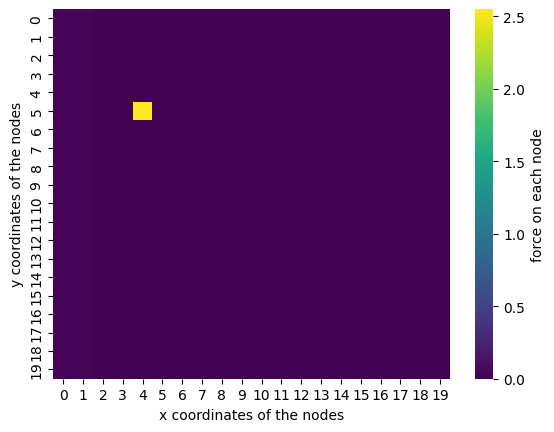

In [196]:
c = node_coordinates(20, 20)
c[5][3][0] = -1
k1 =  0.4
k2 = 0.05
dt = 0.1
f = force_due_to_nl_spring_in_2d(k1,k2,c,dt)
f = np.abs(f)
plot = sns.heatmap(f, cmap='viridis', cbar_kws={'label':'force on each node'})
plot.set_xlabel('x coordinates of the nodes')
plot.set_ylabel('y coordinates of the nodes')
plt.savefig("0.1.png")
f.max()